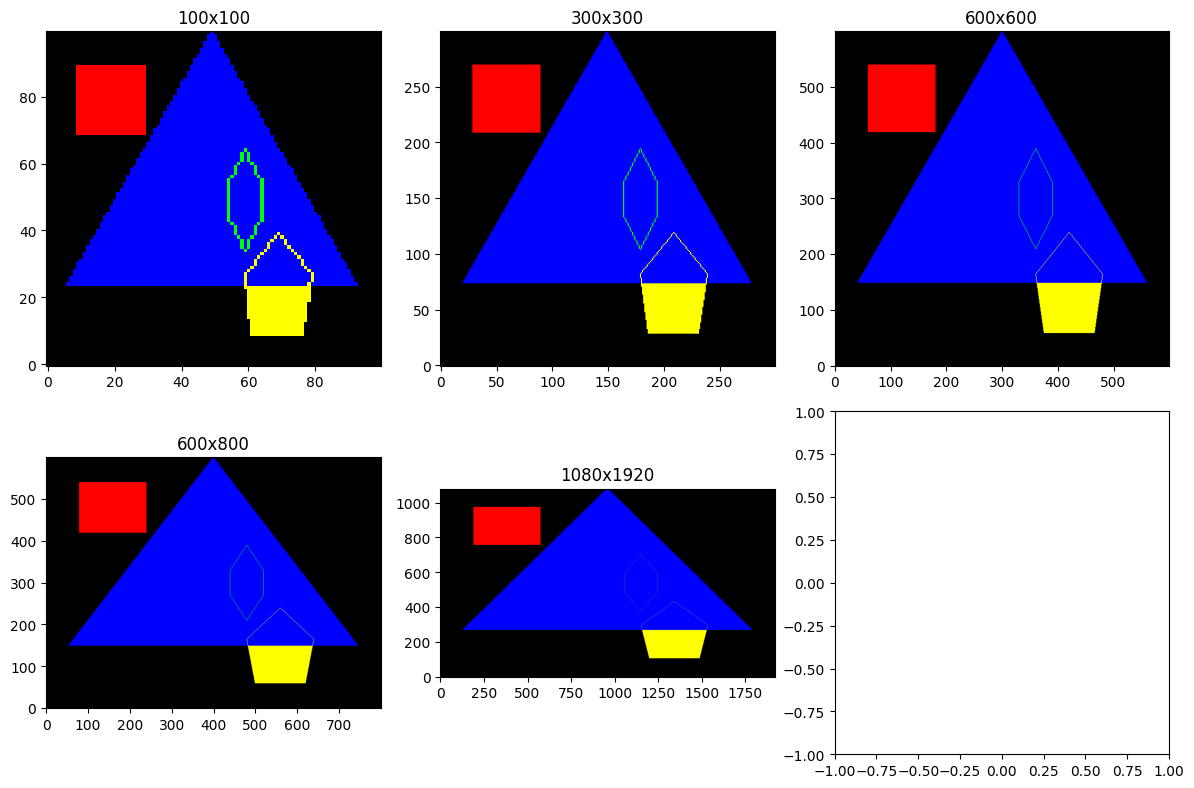

In [1]:
#Operações com as matrizes
import numpy as np
#Biblioteca para plotar os gráficos
import matplotlib.pyplot as plt

#Declarar pontos para plotar
pontos_quad = [(0.8, -0.8), (0.8, -0.4), (0.4, -0.4), (0.4, -0.8)]  # quadrado
pontos_hex = [(0.8, 0.4), (0.6, 0.6), (0.4, 0.6), (0.2, 0.4), (0.4, 0.2), (0.6, 0.2)]  # heaxagono
pontos_triang = [(-0.2, -0.6), (-0.8, -0.4), (-0.8, -0.8)]  # triangulo
pontos_pent = [(-0.2, 0.4), (-0.45, 0.6), (-0.8, 0.55), (-0.8, 0.25), (-0.45, 0.2)]  # pentagono
pontos_triang_equilatero = [(1, 0), (-0.5, -0.866), (-0.5, 0.866)] #triangulo equilatero


# plotarX = [-0.8,-0.4,-0.4,-0.8]
# #adiciona o primeiro ponto x ao final para fechar o poligono
# plotarX.append(plotarX[0])

# plotarY = [0.8,0.8,0.4,0.4]
# #adiciona o primeiro ponto y ao final para fechar o poligono
# plotarY.append(plotarY[0])

resolutions = [(100, 100), (300, 300), (600, 600), (600, 800), (1080, 1920)]

class Matriz:
    def __init__(self):
        #Entender melhor como essa função funciona. 
        self.matriz = [np.zeros(res + (3,), dtype=np.uint8) for res in resolutions]

    def zerarMatriz(self):
        self.matriz.clear()
        self.matriz = [np.zeros(res + (3,), dtype=np.uint8) for res in resolutions]

class Reta:
    def __init__(self, pontos, color=(1, 1, 1)):
        self.pontos = pontos
        self.color = color

    # Desenhar Reta
    def draw_Reta(self, matriz):
        for matriz_desenho in matriz:
            for i in range(len(self.pontos) - 1):
                #Entender melhor se isso é ponteiro ou nao 
                x1, y1 = ajustar_res(*self.pontos[i], *matriz_desenho.shape[:2])
                x2, y2 = ajustar_res(*self.pontos[i + 1], *matriz_desenho.shape[:2])
                pontos_rasterizados = rasterizar(x1, y1, x2, y2)
                for p in pontos_rasterizados:
                    if 0 <= p[0] < matriz_desenho.shape[0] and 0 <= p[1] < matriz_desenho.shape[1]:
                        matriz_desenho[p[0], p[1]] = self.color

class Poligono:
    def __init__(self, pontos, color=(1, 1, 1)):
        self.pontos = pontos
        self.color = color

    # Desenhar Polígono
    def draw_poligono(self, matriz):
        for matriz_desenho in matriz:
            for i in range(len(self.pontos)):
                x1, y1 = ajustar_res(*self.pontos[i], *matriz_desenho.shape[:2])
                x2, y2 = ajustar_res(*self.pontos[(i + 1) % len(self.pontos)], *matriz_desenho.shape[:2])
                pontos_rasterizados = rasterizar(x1, y1, x2, y2)
                for p in pontos_rasterizados:
                    if 0 <= p[0] < matriz_desenho.shape[0] and 0 <= p[1] < matriz_desenho.shape[1]:
                        matriz_desenho[p[0], p[1]] = self.color
            preenche_poligono(matriz_desenho, self.color)

class Tela:
    def __init__(self):
        self.lines = []
        self.polygons = []

    # Adicionar Reta
    def add_Reta(self, reta):
        self.lines.append(reta)

    # Adicionar Poligono
    def add_Poligono(self, polygon):
        self.polygons.append(polygon)
    
    # Remover Poligono
    def remover_Poligono(self):
        self.polygons.pop()
        myMatriz.zerarMatriz()

    # Remover Reta
    def remove_Reta(self):
        if len(self.lines) != 0:
            self.lines.pop()
            myMatriz.zerarMatriz()

    # Desenhar Tela
    def draw_Tela(self, matriz):
        for linha in self.lines:
            linha.draw_Reta(matriz)

        for polygon in self.polygons:
            polygon.draw_poligono(matriz)

myMatriz = Matriz()

#Plota e mostra os gráficos
def mostrar(img, px, py):
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    axs = axs.ravel()

    for i in range(len(myMatriz.matriz)):
        axs[i].imshow(myMatriz.matriz[i].astype("uint8"))
        axs[i].set_title(f"{resolutions[i][0]}x{resolutions[i][1]}")
        axs[i].invert_yaxis()
    plt.tight_layout()

    plt.xlim([-1, 1])
    plt.ylim([-1, 1])

    # plt.plot([x1,x2..,xn],[y1,y2...,yn])
    # fig.delaxes(axs[6])
    # plt.plot(px,py)

    plt.show()

# Realiza o calculo para redimencionar a reta em relação a resolução
def ajustar_res(x_antigo, y_antigo, l, a):
    x_novo = int(((l - 1) * (x_antigo+1)) / 2)
    y_novo = int(((a-1)*(y_antigo+1))/2)
    return x_novo, y_novo

# Rasterizar reta
def rasterizar(x1, y1, x2, y2):
    lista = []

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    if dy == 0:
        steps = dx or 1
    elif dx >= dy:
        steps = dx
    else:
        steps = dy

    x_inc = (x2 - x1) / steps
    y_inc = (y2 - y1) / steps

    x = x1
    y = y1

    for i in range(steps):
        xm, ym = produz_fragmento(x, y)
        lista.append((xm, ym))
        x += x_inc
        y += y_inc

    xm, ym = produz_fragmento(x2, y2)
    lista.append((xm, ym))

    return lista
# Produzir fragmento
def produz_fragmento(x, y):
    xm = round(x)
    ym = round(y)
    return xm, ym

#Preencher
def preenche_poligono(matriz, cor):
    # lista para guardar as posições horizontais
    horizontal = []
    # ler a matriz horizontalmente e guardar as posições internas
    for i in range(matriz.shape[0]):
        dentro = False
        horizontalLinha = []
        counter = 0
        for j in range(matriz.shape[1]):
            if all(matriz[i][j] == cor):
                if all(matriz[i][min(matriz.shape[1] - 1, j + 1)] ==  [0, 0, 0]): 
                    counter += 1
                    dentro = not dentro
            # elif dentro and (all(matriz[i][j] == cor) or (any(matriz[i][j] != [0, 0, 0]) and all(matriz[i][j] != cor) and all(matriz[i][j] != [255, 255, 255]))):
            #     # encontrou outra cor, continua procurando até achar a cor original novamente
            #     while j < matriz.shape[1] and (all(matriz[i][j] != cor) or (any(matriz[i][j] != [0, 0, 0]) and all(matriz[i][j] != cor) and all(matriz[i][j] != [255, 255, 255]))):
            #         j += 1
                # if j < matriz.shape[1]:
                #     dentro = not dentro
            elif dentro:
                horizontalLinha.append((j, i))
        if counter == 1 or counter == 0:
            horizontalLinha.clear()
        else:
            for elemento in horizontalLinha:
                horizontal.append(elemento)

    # pintar os pontos internos na matriz
    for point in horizontal:
        matriz[point[1]][point[0]] = cor


def add_Resolution(resolution):
    resolutions.append(resolution)
    
def remove_Resolution():
    resolutions.pop()
    
# Cor
azul = (0, 0, 255)
vermelho = (255, 0, 0)
amarelo = (255, 255, 0)
verde = (0, 255, 0)
branco = (255, 255, 255)
rosa = (255, 20, 147)

tela = Tela()
# # tela.add_Reta(Reta([(y1, x1), (y2, x2)], color=azul))
# tela.add_Reta(Reta([(-1, -1), (1, 1)], color=azul))
# tela.add_Reta(Reta([(0, -1), (0, 1)], color= rosa))
# tela.add_Reta(Reta([(-1, 0), (1, 0)], color= rosa))
# tela.add_Reta(Reta([(1, -1), (-1, 1)], color=vermelho))
# tela.add_Reta(Reta([(-1,-0.5), (1,-0.5 )], color=branco))

triangulo = Poligono(pontos_triang_equilatero, azul)
quadrado = Poligono(pontos_quad, vermelho)
hexagono = Poligono(pontos_hex, verde)
pentagono = Poligono(pontos_pent, amarelo)

# # pp = [(y1,x1),(y2,x2)...,(yn,xn)]
# pt1 = [(0.9,-0.5), (0.5,-0.9), (0.6,0)]
# pt2 = [(-0.4, 0.6), (-0.6,0.4), (-0.7,0.9)]
# pq1 = [(-0.8, -0.8), (-0.6, -0.8), (-0.6, -0.6), (-0.8, -0.6)]
# pq2 = [(0.7, 0.7), (0.9, 0.7), (0.9, 0.9), (0.7, 0.9)]
ph1 = [(-0.1, 0.1), (-0.3, 0.2), (-0.1, 0.3), (0.1, 0.3), (0.3, 0.2), (0.1, 0.1)]
# ph2 = [(0.4, -0.2), (0.2, -0.4), (-0.2, -0.4), (-0.4, -0.2), (-0.2, 0), (0.2, 0)]

# triangulo1 = Poligono(pt1, azul)
# triangulo2 = Poligono(pt2, vermelho)

# quadrado1 = Poligono(pq1, azul)
# quadrado2 = Poligono(pq2, vermelho)

hexagono1 = Poligono(ph1, verde)
# hexagono2 = Poligono(ph2, amarelo)


tela.add_Poligono(triangulo)
# tela.add_Poligono(triangulo2)
tela.add_Poligono(quadrado)
# tela.add_Poligono(quadrado2)
tela.add_Poligono(hexagono1)
tela.add_Poligono(pentagono)

tela.draw_Tela(myMatriz.matriz)
mostrar(myMatriz.matriz,0,0)

# # rt.myMatriz.zerarMatriz()
# # meuPoligono = rt.Poligono([[],[]], cor)
# # tela.add_Poligono(meuPoligono)

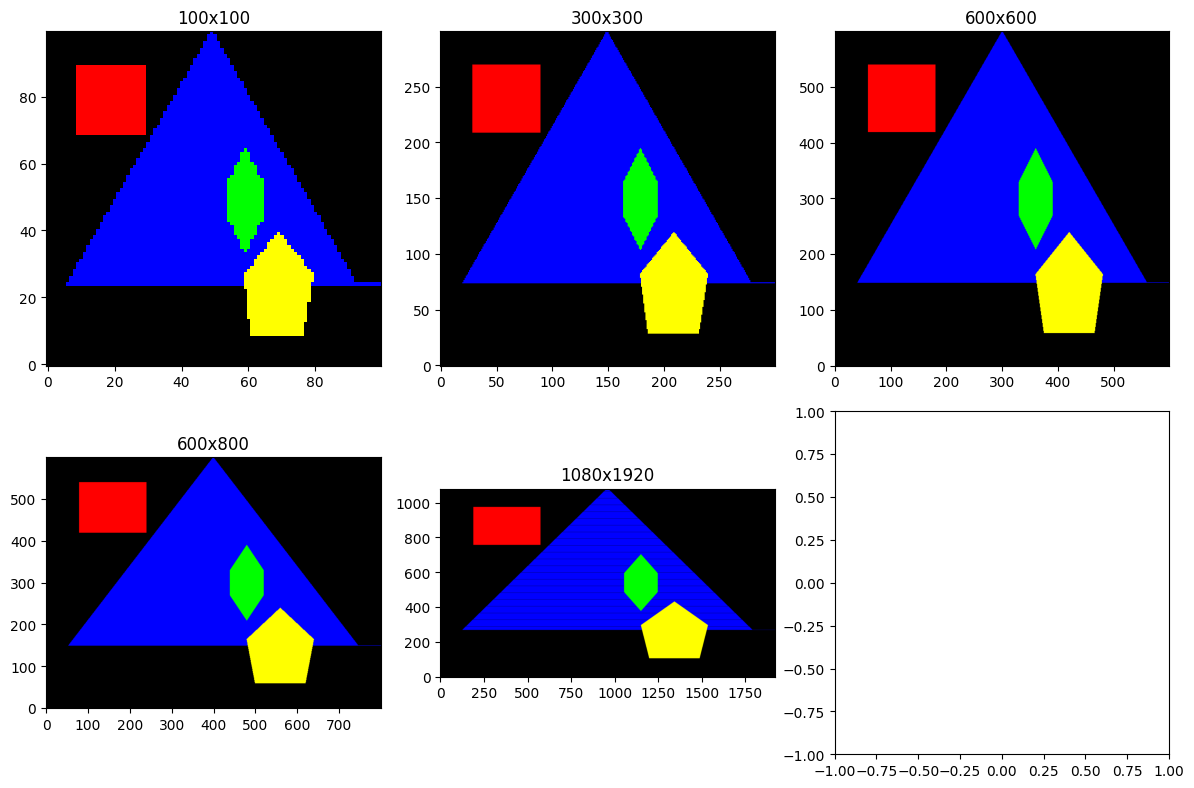

In [1]:
#Operações com as matrizes
import numpy as np
#Biblioteca para plotar os gráficos
import matplotlib.pyplot as plt

#Declarar pontos para plotar
pontos_quad = [(0.8, -0.8), (0.8, -0.4), (0.4, -0.4), (0.4, -0.8)]  # quadrado
pontos_hex = [(0.8, 0.4), (0.6, 0.6), (0.4, 0.6), (0.2, 0.4), (0.4, 0.2), (0.6, 0.2)]  # heaxagono
pontos_triang = [(-0.2, -0.6), (-0.8, -0.4), (-0.8, -0.8)]  # triangulo
pontos_pent = [(-0.2, 0.4), (-0.45, 0.6), (-0.8, 0.55), (-0.8, 0.25), (-0.45, 0.2)]  # pentagono
pontos_triang_equilatero = [(1, 0), (-0.5, -0.866), (-0.5, 0.866)] #triangulo equilatero


# plotarX = [-0.8,-0.4,-0.4,-0.8]
# #adiciona o primeiro ponto x ao final para fechar o poligono
# plotarX.append(plotarX[0])

# plotarY = [0.8,0.8,0.4,0.4]
# #adiciona o primeiro ponto y ao final para fechar o poligono
# plotarY.append(plotarY[0])

resolutions = [(100, 100), (300, 300), (600, 600), (600, 800), (1080, 1920)]

class Matriz:
    def __init__(self):
        #Entender melhor como essa função funciona. 
        self.matriz = [np.zeros(res + (3,), dtype=np.uint8) for res in resolutions]

    def zerarMatriz(self):
        self.matriz.clear()
        self.matriz = [np.zeros(res + (3,), dtype=np.uint8) for res in resolutions]

class Reta:
    def __init__(self, pontos, color=(1, 1, 1)):
        self.pontos = pontos
        self.color = color

    # Desenhar Reta
    def draw_Reta(self, matriz):
        for matriz_desenho in matriz:
            for i in range(len(self.pontos) - 1):
                #Entender melhor se isso é ponteiro ou nao 
                x1, y1 = ajustar_res(*self.pontos[i], *matriz_desenho.shape[:2])
                x2, y2 = ajustar_res(*self.pontos[i + 1], *matriz_desenho.shape[:2])
                pontos_rasterizados = rasterizar(x1, y1, x2, y2)
                for p in pontos_rasterizados:
                    if 0 <= p[0] < matriz_desenho.shape[0] and 0 <= p[1] < matriz_desenho.shape[1]:
                        matriz_desenho[p[0], p[1]] = self.color

class Poligono:
    def __init__(self, pontos, color=(1, 1, 1)):
        self.pontos = pontos
        self.color = color

    # Desenhar Polígono
    def draw_poligono(self, matriz):
        for matriz_desenho in matriz:
            for i in range(len(self.pontos)):
                x1, y1 = ajustar_res(*self.pontos[i], *matriz_desenho.shape[:2])
                x2, y2 = ajustar_res(*self.pontos[(i + 1) % len(self.pontos)], *matriz_desenho.shape[:2])
                pontos_rasterizados = rasterizar(x1, y1, x2, y2)
                for p in pontos_rasterizados:
                    if 0 <= p[0] < matriz_desenho.shape[0] and 0 <= p[1] < matriz_desenho.shape[1]:
                        matriz_desenho[p[0], p[1]] = self.color
            preenche_poligono(matriz_desenho, self.color)

class Tela:
    def __init__(self):
        self.lines = []
        self.polygons = []

    # Adicionar Reta
    def add_Reta(self, reta):
        self.lines.append(reta)

    # Adicionar Poligono
    def add_Poligono(self, polygon):
        self.polygons.append(polygon)
    
    # Remover Poligono
    def remover_Poligono(self):
        self.polygons.pop()
        myMatriz.zerarMatriz()

    # Remover Reta
    def remove_Reta(self):
        if len(self.lines) != 0:
            self.lines.pop()
            myMatriz.zerarMatriz()

    # Desenhar Tela
    def draw_Tela(self, matriz):
        for linha in self.lines:
            linha.draw_Reta(matriz)

        for polygon in self.polygons:
            polygon.draw_poligono(matriz)

myMatriz = Matriz()

#Plota e mostra os gráficos
def mostrar(img, px, py):
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    axs = axs.ravel()

    for i in range(len(myMatriz.matriz)):
        axs[i].imshow(myMatriz.matriz[i].astype("uint8"))
        axs[i].set_title(f"{resolutions[i][0]}x{resolutions[i][1]}")
        axs[i].invert_yaxis()
    plt.tight_layout()

    plt.xlim([-1, 1])
    plt.ylim([-1, 1])

    # plt.plot([x1,x2..,xn],[y1,y2...,yn])
    # fig.delaxes(axs[6])
    # plt.plot(px,py)

    plt.show()

# Realiza o calculo para redimencionar a reta em relação a resolução
def ajustar_res(x_antigo, y_antigo, l, a):
    x_novo = int(((l - 1) * (x_antigo+1)) / 2)
    y_novo = int(((a-1)*(y_antigo+1))/2)
    return x_novo, y_novo

# Rasterizar reta
def rasterizar(x1, y1, x2, y2):
    lista = []

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    if dy == 0:
        steps = dx or 1
    elif dx >= dy:
        steps = dx
    else:
        steps = dy

    x_inc = (x2 - x1) / steps
    y_inc = (y2 - y1) / steps

    x = x1
    y = y1

    for i in range(steps):
        xm, ym = produz_fragmento(x, y)
        lista.append((xm, ym))
        x += x_inc
        y += y_inc

    xm, ym = produz_fragmento(x2, y2)
    lista.append((xm, ym))

    return lista
# Produzir fragmento
def produz_fragmento(x, y):
    xm = round(x)
    ym = round(y)
    return xm, ym

#Preencher
def preenche_poligono(matriz, cor):
    # lista para guardar as posições horizontais
    horizontal = []
    # ler a matriz horizontalmente e guardar as posições internas
    for i in range(matriz.shape[0]):
        dentro = False
        horizontalLinha = []
        counter = 0
        for j in range(matriz.shape[1]):
            if all(matriz[i][j] == cor):
                if all(matriz[i][min(matriz.shape[1] - 1, j + 1)] == [0, 0, 0]) or all(matriz[i][min(matriz.shape[1] - 1, j + 1)] == [0, 0, 255]): 
                    counter += 1
                    dentro = not dentro
            elif dentro and (all(matriz[i][j] == cor) or (any(matriz[i][j] != [0, 0, 0]) and all(matriz[i][j] != cor) and all(matriz[i][j] != [255, 255, 255]))):
                # encontrou outra cor, continua procurando até achar a cor original novamente
                while j < matriz.shape[1] and (all(matriz[i][j] != cor) or (any(matriz[i][j] != [0, 0, 0]) and all(matriz[i][j] != cor) and all(matriz[i][j] != [255, 255, 255]))):
                    j += 1
                if j < matriz.shape[1]:
                    dentro = not dentro
            elif dentro:
                horizontalLinha.append((j, i))
        if counter == 1 or counter == 0:
            horizontalLinha.clear()
        else:
            for elemento in horizontalLinha:
                horizontal.append(elemento)

    # pintar os pontos internos na matriz
    for point in horizontal:
        matriz[point[1]][point[0]] = cor


def add_Resolution(resolution):
    resolutions.append(resolution)
    
def remove_Resolution():
    resolutions.pop()
    
# Cor
azul = (0, 0, 255)
vermelho = (255, 0, 0)
amarelo = (255, 255, 0)
verde = (0, 255, 0)
branco = (255, 255, 255)
rosa = (255, 20, 147)

tela = Tela()
# # tela.add_Reta(Reta([(y1, x1), (y2, x2)], color=azul))
# tela.add_Reta(Reta([(-1, -1), (1, 1)], color=azul))
# tela.add_Reta(Reta([(0, -1), (0, 1)], color= rosa))
# tela.add_Reta(Reta([(-1, 0), (1, 0)], color= rosa))
# tela.add_Reta(Reta([(1, -1), (-1, 1)], color=vermelho))
# tela.add_Reta(Reta([(-1,-0.5), (1,-0.5 )], color=branco))

triangulo = Poligono(pontos_triang_equilatero, azul)
quadrado = Poligono(pontos_quad, vermelho)
hexagono = Poligono(pontos_hex, verde)
pentagono = Poligono(pontos_pent, amarelo)

# # pp = [(y1,x1),(y2,x2)...,(yn,xn)]
# pt1 = [(0.9,-0.5), (0.5,-0.9), (0.6,0)]
# pt2 = [(-0.4, 0.6), (-0.6,0.4), (-0.7,0.9)]
# pq1 = [(-0.8, -0.8), (-0.6, -0.8), (-0.6, -0.6), (-0.8, -0.6)]
# pq2 = [(0.7, 0.7), (0.9, 0.7), (0.9, 0.9), (0.7, 0.9)]
ph1 = [(-0.1, 0.1), (-0.3, 0.2), (-0.1, 0.3), (0.1, 0.3), (0.3, 0.2), (0.1, 0.1)]
# ph2 = [(0.4, -0.2), (0.2, -0.4), (-0.2, -0.4), (-0.4, -0.2), (-0.2, 0), (0.2, 0)]

# triangulo1 = Poligono(pt1, azul)
# triangulo2 = Poligono(pt2, vermelho)

# quadrado1 = Poligono(pq1, azul)
# quadrado2 = Poligono(pq2, vermelho)

hexagono1 = Poligono(ph1, verde)
# hexagono2 = Poligono(ph2, amarelo)


tela.add_Poligono(triangulo)
# tela.add_Poligono(triangulo2)
tela.add_Poligono(quadrado)
# tela.add_Poligono(quadrado2)
tela.add_Poligono(hexagono1)
tela.add_Poligono(pentagono)

tela.draw_Tela(myMatriz.matriz)
mostrar(myMatriz.matriz,0,0)

# # rt.myMatriz.zerarMatriz()
# # meuPoligono = rt.Poligono([[],[]], cor)
# # tela.add_Poligono(meuPoligono)